In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
imdb = keras.datasets.imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
# 数据处理-自己写函数处理
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [7]:
# 数据处理-使用库
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
y_val = y_train[:10000]
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]

In [8]:
# 建立模型
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [9]:
# 训练模型
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 623us/sample - loss: 0.4971 - acc: 0.7849 - val_loss: 0.3691 - val_acc: 0.8717
Epoch 2/20
15000/15000 [==============================] - 4s 249us/sample - loss: 0.2895 - acc: 0.9052 - val_loss: 0.2969 - val_acc: 0.8888
Epoch 3/20
15000/15000 [==============================] - 3s 184us/sample - loss: 0.2122 - acc: 0.9323 - val_loss: 0.2772 - val_acc: 0.8892
Epoch 4/20
15000/15000 [==============================] - 3s 226us/sample - loss: 0.1675 - acc: 0.9453 - val_loss: 0.3012 - val_acc: 0.8799
Epoch 5/20
15000/15000 [==============================] - 3s 203us/sample - loss: 0.1350 - acc: 0.9563 - val_loss: 0.3107 - val_acc: 0.8754
Epoch 6/20
15000/15000 [==============================] - 3s 189us/sample - loss: 0.1112 - acc: 0.9655 - val_loss: 0.2980 - val_acc: 0.8856
Epoch 7/20
15000/15000 [==============================] - 3s 206us/sample - loss: 0.0912 - acc: 0.9735 - val_l

In [10]:
# 验证
results = model.evaluate(x_test, y_test)
print('results', results)

results [0.797210034532547, 0.84836]


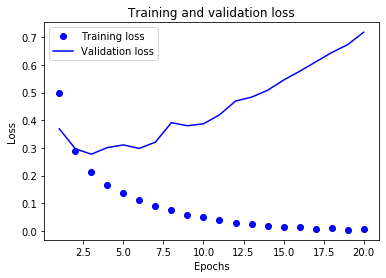

In [16]:
# 显示数据
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()